In [1]:
%matplotlib inline
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

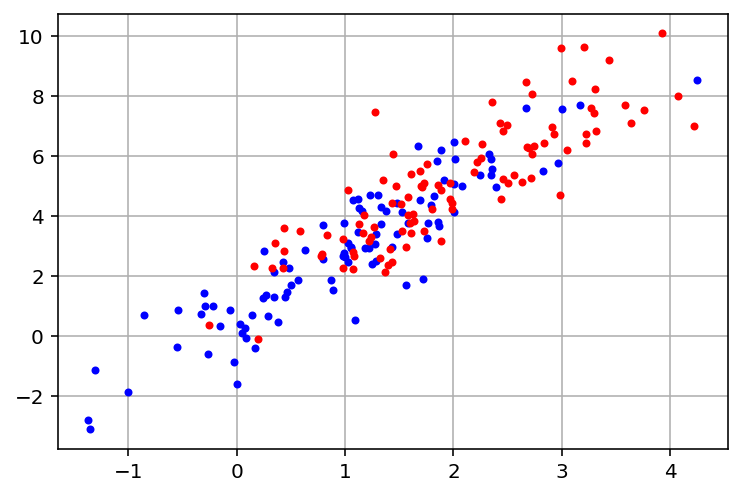

In [2]:
np.random.seed(12345)
nd = 100
x1p = np.random.randn(nd)+1
x1n = np.random.randn(nd)+2

x2p = x1p *2 + 1 + np.random.randn(nd)
x2n = x1n *2 + 1 + np.random.randn(nd)

x1 = np.concatenate([x1p, x1n])
x2 = np.concatenate([x2p, x2n])

xs = np.vstack([x1, x2]) #now the index for data point is the second index.
ys = np.concatenate([[1]*nd, [-1]*nd])
plt.plot(x1[ys>0], x2[ys>0], '.b')
plt.plot(x1[ys<0], x2[ys<0], '.r')
plt.grid(True)


In [6]:
data = xs.T

In [8]:
data.shape

(200, 2)

1) Normalize the data so that the mean of each feature is 0 and standard deviation of each feature is 1.

In [28]:
tmp = data - np.mean(data, axis=0)
np.mean(tmp, axis=0)

norm_xs = tmp/np.std(tmp, axis=0)
np.mean(norm_xs, axis=0), np.std(norm_xs, axis=0)


cov = norm_xs.T @ norm_xs


eigen_val, eigen_vecs = np.linalg.eigh(cov)

e0 = eigen_vecs[:, 0]
e1 = eigen_vecs[:, 1]


eigen_val

array([ 18.89364238, 381.10635762])

In [40]:
z1 = norm_xs @ e1
#print(z1)
print(np.std(z1))


z0 = norm_xs @ e0
#print(z1)
print(np.std(z0))


z = norm_xs @ eigen_vecs

#print(z)
print(np.std(z, axis=0))

1.3804100072434549
0.30735681528497993
[0.30735682 1.38041001]


2) What is the criteria for picking better axis?

(-1.2584080277818914,
 0.971639766460795,
 -3.676716065648408,
 4.2293481471539245)

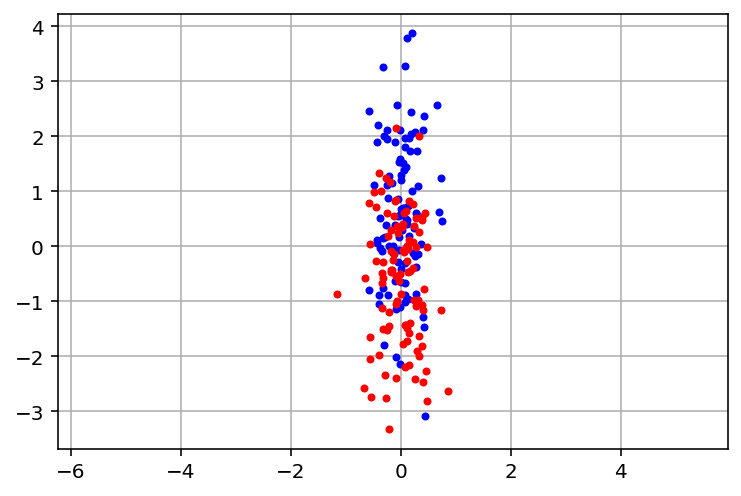

In [42]:
plt.plot(z[ys>0, 0], z[ys>0, 1], '.b')
plt.plot(z[ys<0, 0], z[ys<0, 1], '.r')
plt.grid(True)
plt.axis('equal')

3) What is the size of the covariance matrix? Why?

4) Find eigenvalue and eigenvector of the covariance matrix.

5) Draw the eigenvectors on the plot.

6) Use eigenvector and compute the transformed feature vector.

7) Plot transformed data point.

# Handwritten Digit Recognition.

In [51]:
D = loadmat('usps_resampled/usps_resampled.mat')
print D
#it is a dictionary of four elements
# train_labels for the number of each training image
# train_patterns for the train images
# test_labels
# test_patterns

{'train_labels': array([[-1,  1, -1, ..., -1, -1, -1],
       [-1, -1,  1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1,  1, -1],
       ..., 
       [-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ...,  1, -1, -1]], dtype=int16), 'test_labels': array([[ 1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ..., 
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ...,  1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int16), 'train_patterns': array([[-0.99999988, -0.99999982, -0.99999988, ..., -0.9999997 ,
        -0.99997759, -0.99993992],
       [-0.9999997 , -0.99999845, -0.99999988, ..., -0.99996912,
        -0.99797225, -0.99719542],
       [-0.99998665, -0.99989259, -0.99999988, ..., -0.9983288 ,
        -0.96142083, -0.95687085],
       ..., 
       [-0.93985581, -0.76438236, -0.99999988, ..., -0.99999988,
        -0.97830033, -0.99999988],
       [-0.99104893, -0.9

(256, 4649)


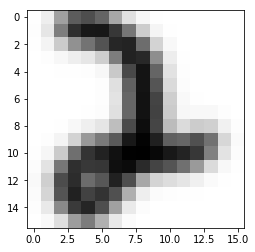

In [63]:
images = D['train_patterns']
print images.shape
def show(img):
    im = img.reshape(16,16) #you can try print it
    plt.imshow(im, interpolation='none', cmap=cm.Greys)
show(images[:,4610])